# DS-SF-32 | Homework 02: The `pandas` Library

In this homework, we will be exploring the `police shootings` dataset using `pandas`.

In [37]:
import pandas as pd
from __future__ import division  
import matplotlib.pyplot as plt

In [4]:
killings = pd.read_csv('/Users/richardgraham-bruno/DataScience/DS_32_HW/police-killings.csv')
killings.shape

(467, 15)

#### A) Starter question: Display a few lines of the dataset to the screen.

In [5]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)


#### 1. Make the following changed to column names:

+ lawenforcementagency -> agency
+ raceethnicity        -> race


In [17]:
killings.columns
killings.rename(
    columns={'lawenforcementagency':'agency',
             'raceethnicity':'race'}, 
    inplace=True)
killings.columns

Index([u'Unnamed: 0', u'name', u'age', u'gender', u'race', u'month', u'day',
       u'year', u'streetaddress', u'city', u'state', u'agency', u'cause',
       u'armed', u'county_income'],
      dtype='object')


#### 2. Show the count of missing values in each column


In [6]:
killings.isnull().sum()

Unnamed: 0              0
name                    0
age                     0
gender                  0
raceethnicity           0
                       ..
state                   0
lawenforcementagency    0
cause                   0
armed                   0
county_income           0
dtype: int64

#### 3. replace each null value in the dataframe with the string "Unknown"

In [16]:
killings.fillna(value='Unkown', inplace = True)
killings.isnull().sum()

Unnamed: 0              0
name                    0
age                     0
gender                  0
raceethnicity           0
                       ..
state                   0
lawenforcementagency    0
cause                   0
armed                   0
county_income           0
dtype: int64

#### 4. How many killings were there so far in 2015?

In [15]:
killings.year.value_counts()

2015    467
Name: year, dtype: int64

#### 5. Of all killings, how many were male and how many female?

In [14]:
killings.gender.value_counts()

Male      445
Female     22
Name: gender, dtype: int64

#### 6. How many killings were of unarmed people?


In [18]:
killings.armed[killings.armed=='No'].value_counts()

No    102
Name: armed, dtype: int64

#### 7. What percentage of all killings were unarmed?


In [23]:
unarmed_killings = killings.armed[killings.armed=='No'].value_counts()
unarmed_killings / len(killings)

No    0.218415
Name: armed, dtype: float64

#### 8. What are the 5 states with the most killings?


In [24]:
killings.state.value_counts().head(5)

CA    74
TX    46
FL    29
AZ    25
OK    22
Name: state, dtype: int64

#### 9. Show a value counts of deaths for each race


In [25]:
killings.race.value_counts()

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: race, dtype: int64

#### 10. Display a histogram of ages of all killings


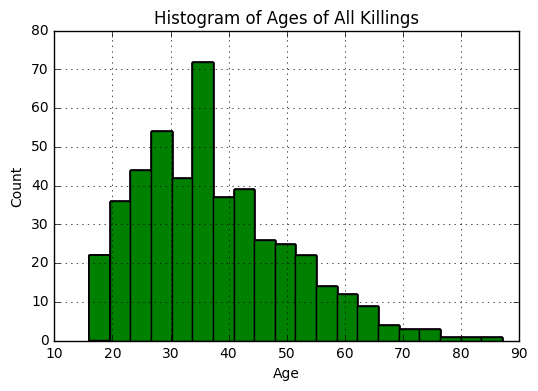

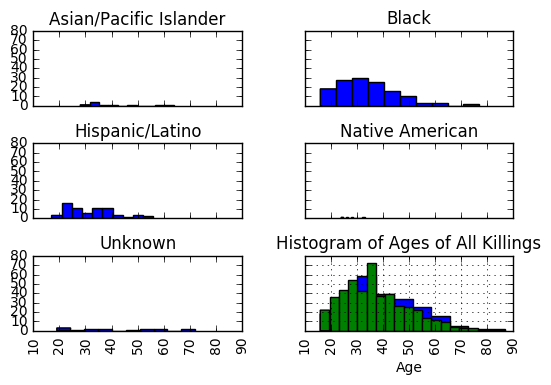

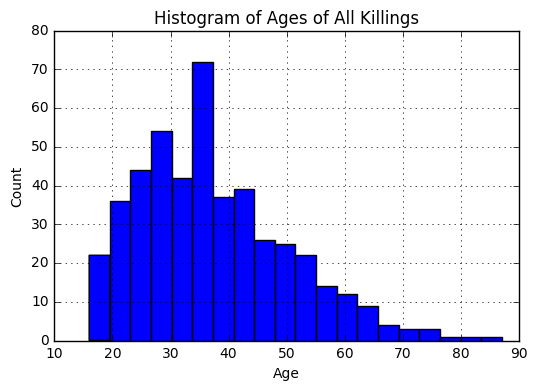

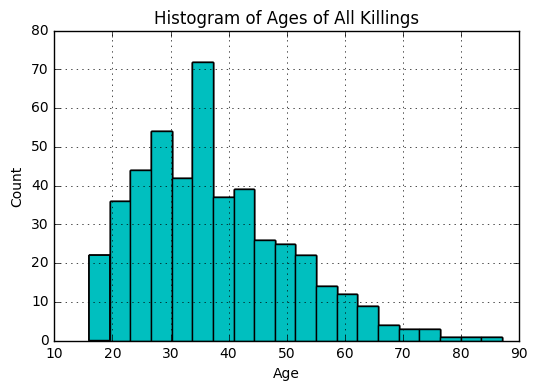

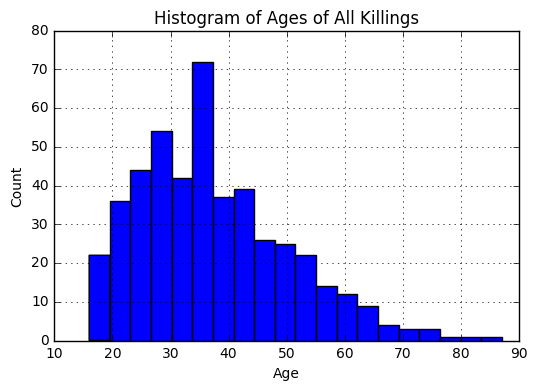

In [49]:
fig = plt.figure()
ax = killings.age.hist(bins=20)
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Histogram of Ages of All Killings')
plt.show()

#### 11. Show 6 histograms of ages by race


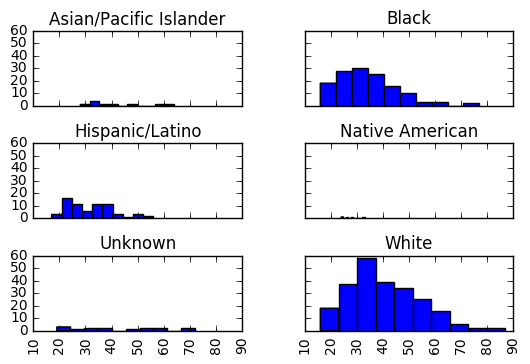

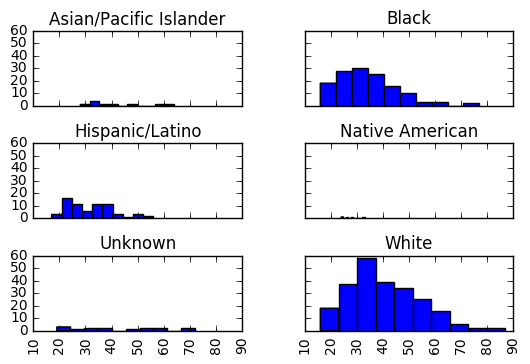

In [51]:
killings.age.hist(by=killings.race,sharex=True, sharey=True)
plt.show()

#### 12. What is the average age of death by race?


In [52]:
killings.groupby('race').age.mean()

race
Asian/Pacific Islander    40.800000
Black                     34.044444
Hispanic/Latino           31.716418
Native American           27.750000
Unknown                   43.533333
White                     40.466102
Name: age, dtype: float64

#### 13. Show a bar chart with counts of deaths every month


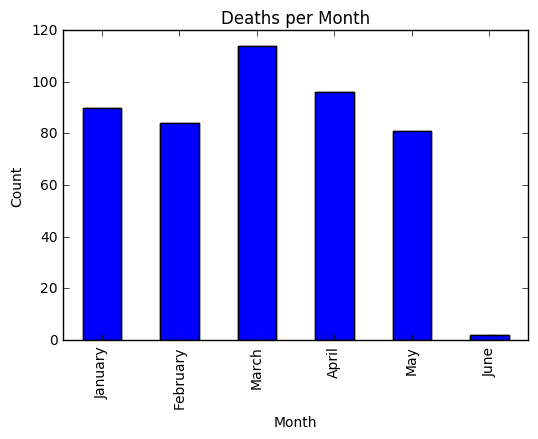

In [54]:
killings['month_num'] = killings.month.replace({
                                                'January':1,
                                                'February':2,
                                                'March':3,
                                                'April':4,
                                                'May':5,
                                                'June':6
                                            })
counts = killings.groupby('month_num').month_num.count()
counts.index = ['January', 'February', 'March', 'April', 'May', 'June']
ax = counts.plot(kind = 'bar',title='Deaths per Month')
ax.set_xlabel('Month')
ax.set_ylabel('Count')
plt.show()